In [1]:
import numpy as np
import keras
from keras.models import load_model
import csv
from createdatas2 import createdata2,gaussian_beam
import datetime
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit    # フィッティング用
import os #システム操作系
from pathlib import Path #ファイル操作系
dt_now = datetime.datetime.now()
print('現在時刻：', dt_now)

file_num = 20 #テストファイル数20
test_num = 101 #データ数(0%~100%)
data_size = 100 #配列の大きさ
fit_param_x = np.zeros((file_num, 4))
fit_param_y = np.zeros((file_num, 4))
t_101 = np.zeros((file_num ,test_num, 3))
ty = np.zeros((file_num ,test_num, 3))
x_101 = np.zeros((file_num, test_num, data_size))
y_101 = np.zeros((file_num, test_num, data_size))
pred_x = np.zeros((file_num ,test_num))
test_nums = range(0, test_num)
error = np.zeros((file_num, test_num))
abs_error = np.zeros((file_num, test_num))

Using TensorFlow backend.


現在時刻： 2020-12-14 20:00:09.627878


In [2]:
# グラフの初期設定
plt.rcParams["figure.figsize"] = [3.14, 3.14] # 図の縦横のサイズ([横(inch),縦(inch)])
plt.rcParams["figure.dpi"] = 200 # dpi(dots per inch)
plt.rcParams["figure.facecolor"] = 'white' # 図の背景色
plt.rcParams["figure.edgecolor"] = 'black' # 枠線の色
plt.rcParams["font.family"] = "serif"       # 使用するフォント
plt.rcParams["font.serif"] = "Times New Roman"
plt.rcParams["font.size"] = 14              # 基本となるフォントの大きさ
plt.rcParams["xtick.direction"] = "in"      # 目盛り線の向き、内側"in"か外側"out"かその両方"inout"か
plt.rcParams["ytick.direction"] = "in"      # 目盛り線の向き、内側"in"か外側"out"かその両方"inout"か
plt.rcParams["xtick.bottom"] = True         # 下部に目盛り線を描くかどうか
plt.rcParams["ytick.left"] = True           # 左部に目盛り線を描くかどうか
plt.rcParams["xtick.major.size"] = 2.0      # x軸主目盛り線の長さ
plt.rcParams["ytick.major.size"] = 2.0      # y軸主目盛り線の長さ
plt.rcParams["xtick.major.width"] = 0.3     # x軸主目盛り線の線幅
plt.rcParams["ytick.major.width"] = 0.3     # y軸主目盛り線の線幅
plt.rcParams["xtick.minor.visible"] = False # x軸副目盛り線を描くかどうか
plt.rcParams["ytick.minor.visible"] = False # y軸副目盛り線を描くかどうか
plt.rcParams["xtick.minor.size"] = 2.0      # x軸副目盛り線の長さ
plt.rcParams["ytick.minor.size"] = 2.0      # y軸副目盛り線の長さ
plt.rcParams["xtick.minor.width"] = 0.3     # x軸副目盛り線の線幅
plt.rcParams["ytick.minor.width"] = 0.3     # y軸副目盛り線の線幅
plt.rcParams["xtick.labelsize"] = 8        # 目盛りのフォントサイズ
plt.rcParams["ytick.labelsize"] = 8        # 目盛りのフォントサイズ
plt.rcParams["xtick.major.pad"] = 3.0      # x軸から目盛までの距離
plt.rcParams["ytick.major.pad"] = 4.0      # y軸から目盛までの距離
plt.rcParams["axes.labelsize"] = 10         # 軸ラベルのフォントサイズ
plt.rcParams["axes.linewidth"] = 0.4        # グラフ囲う線の太さ
plt.rcParams["axes.grid"] = False           # グリッドを表示するかどうか

In [3]:
#　テストデータ生成
file_num = 20 #テストファイル数20
test_num = 101 #データ数(0%~100%)
data_size = 100 #配列の大きさ
fit_param_x = np.zeros((file_num, 4))
fit_param_y = np.zeros((file_num, 4))

t_101 = np.zeros((file_num ,test_num, 3))
ty = np.zeros((file_num ,test_num, 3))
x_101 = np.zeros((file_num, test_num, data_size))
y_101 = np.zeros((file_num, test_num, data_size))
n = range(0, file_num)
test_nums = range(0, test_num)


for NOISE in range(0, test_num):
    createdata2(file_num, NOISE, data_size, x_101[:,NOISE,:], y_101[:,NOISE,:], t_101[:,NOISE,:], ty[:,NOISE,:], fit_param_x, fit_param_y)

経過時間:0.1842508316040039[sec]
平均絶対誤差: 0.000000 ± 0.000000
経過時間:0.0388491153717041[sec]
平均絶対誤差: 0.004756 ± 0.002747
経過時間:0.03806900978088379[sec]
平均絶対誤差: 0.007398 ± 0.006865
経過時間:0.040413856506347656[sec]
平均絶対誤差: 0.011047 ± 0.008709
経過時間:0.05374479293823242[sec]
平均絶対誤差: 0.012626 ± 0.012141
経過時間:0.04120802879333496[sec]
平均絶対誤差: 0.018709 ± 0.012731
経過時間:0.0671699047088623[sec]
平均絶対誤差: 0.021219 ± 0.016193
経過時間:0.03867506980895996[sec]
平均絶対誤差: 0.035366 ± 0.022615
経過時間:0.03863191604614258[sec]
平均絶対誤差: 0.023488 ± 0.013868
経過時間:0.03998684883117676[sec]
平均絶対誤差: 0.032516 ± 0.025626
経過時間:0.048545122146606445[sec]
平均絶対誤差: 0.029859 ± 0.026937
経過時間:0.052191972732543945[sec]
平均絶対誤差: 0.048987 ± 0.028313
経過時間:0.04410910606384277[sec]
平均絶対誤差: 0.047088 ± 0.030528
経過時間:0.04561471939086914[sec]
平均絶対誤差: 0.044348 ± 0.035588
経過時間:0.04407668113708496[sec]
平均絶対誤差: 0.045235 ± 0.029436
経過時間:0.056681156158447266[sec]
平均絶対誤差: 0.057440 ± 0.047944
経過時間:0.04685473442077637[sec]
平均絶対誤差: 0.074944 ± 0.051218
経過時間:0.043980

In [9]:
print(t_101)

[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]


In [4]:
NOISE = 80
# このファイルの存在するフォルダの絶対パスを取得
dir_name = str(Path().resolve())
print('このファイルの存在するフォルダ：', dir_name)
# 保存先フォルダのパス作成
save_folder = os.path.join(dir_name, f'201214')
print('保存フォルダ：', save_folder)
# 保存先フォルダの作成(既に存在する場合は無視される)
os.makedirs(save_folder, exist_ok=True)

このファイルの存在するフォルダ： /Users/nagaiyuma/Documents/myprogram
保存フォルダ： /Users/nagaiyuma/Documents/myprogram/201214


In [5]:
#学習パラメータの取得
#出力3
save_model_path = "/Users/nagaiyuma/Documents/myprogram/savefig80%/2020-11-13_23-38_noise80.h5"
model = load_model(save_model_path)
t_101 = t_101.T[1].T
for k in n:
    xtest = x_101[k].reshape(-1, 100, 1)
    pred_x[k] = model.predict(xtest).T[1].flatten()
    error[k] = pred_x[k] - t_101[k]
    abs_error[k] = abs(pred_x[k] - t_101[k])

ave_0 = np.average(error, axis=0)
std_0 = np.std(error, axis=0)

現在時刻： 2020-11-20 16:58:03.842429
保存ファイル名： 2020-11-20_16-58_80%_avestd.svg
保存ファイルパス： /Users/nagaiyuma/Documents/myprogram/savefig80%/2020-11-20_16-58_80%_avestd.svg
0%:-0.01094520092010498±0.0
10%:-0.014951950311660767±0.029449304114071376
20%:-0.032167235016822816±0.07094535091657457
30%:-0.021172836422920227±0.08542230725709152
40%:-0.08311594426631927±0.16006387985959178
50%:0.026630699634552002±0.11551263175610585
60%:0.07740148007869721±0.17003047218194994
70%:-0.005165907740592957±0.12475089218970635
80%:0.035356760025024414±0.17200566392959932
90%:0.07478154003620148±0.1682129639611544
100%:-0.0045878559350967405±0.19093540955641092


/Users/nagaiyuma/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


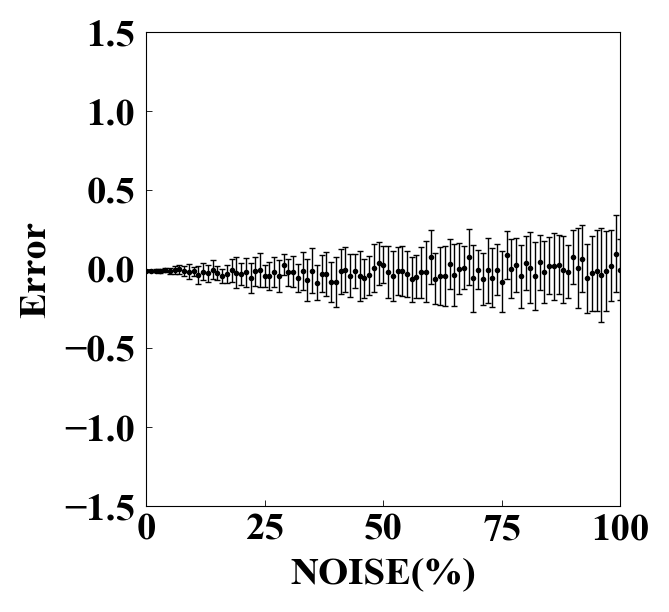

In [7]:
#結果の表示と保存
dt_now = datetime.datetime.now()
print('現在時刻：', dt_now)
save_name = dt_now.strftime("%Y-%m-%d_%H-%M") +f'_{NOISE}%_avestd.svg'
save_file = os.path.join(save_folder, save_name) # 保存先のファイルパス作成
fig = plt.figure()
ax = fig.add_subplot(111)
ax.errorbar(test_nums, ave_0, yerr = std_0, capsize=1, capthick=0.5, fmt='o', markersize=1, elinewidth=0.5 , ecolor='black', markeredgecolor = "black")
ax.set_xlabel('NOISE(%)',fontsize=14)          # 軸ラベル
ax.set_ylabel('Error',fontsize=14)
ax.set_ylim(-1.5, 1.5)
ax.set_xlim(0., 100.)
plt.tick_params(labelsize=14)
ax.set_aspect(1./ax.get_data_ratio()) # グラフを正方形にする
#fig.savefig(save_file, format="svg", bbox_inches="tight")
fig.show()
print('保存ファイル名：', save_name)
print('保存ファイルパス：', save_file)
for i in range(0,110,10):
    print_ave = str(i) + "%:" + str(ave_101_3[i])+ "±" + str(std_101_3[i])
    print(print_ave)

In [6]:
#出力1, Sigmoid
NOISE = 80 #学習ノイズ
save_model_path = "/Users/nagaiyuma/Documents/myprogram/savefig80%/2020-11-20_16-13_noise80.h5"
model = load_model(save_model_path)

In [7]:
#出力1
#t_101 = t_101.T[1].T
print
for k in n:
    xtest = x_101[k].reshape(-1, 100,1)
    pred_x[k] = model.predict(xtest).T.flatten()
    error[k] = pred_x[k] - t_101[k]
    abs_error[k] = abs(pred_x[k] - t_101[k])

ave_1 = np.average(error, axis=0)
std_1 = np.std(error, axis=0)

In [6]:
#出力3, NN
NOISE = 80 #学習ノイズ
save_model_path = "/Users/nagaiyuma/Documents/myprogram/savefig80%/2020-11-19_15-06_noise80.h5"
model = load_model(save_model_path)

In [7]:
#出力3,NN
#t_101 = t_101.T[1].T
print
for k in n:
    xtest = x_101[k]
    pred_x[k] = model.predict(xtest).T[1].flatten()
    error[k] = pred_x[k] - t_101[k]
    abs_error[k] = abs(pred_x[k] - t_101[k])

ave_1 = np.average(error, axis=0)
std_1 = np.std(error, axis=0)

In [8]:
#出力1, ReLU
NOISE = 80 #学習ノイズ
save_model_path = "/Users/nagaiyuma/Documents/myprogram/savefig80%/2020-11-20_17-24_noise80.h5"
model = load_model(save_model_path)

In [9]:
#出力1
#t_101 = t_101.T[1].T
print
for k in n:
    xtest = x_101[k].reshape(-1, 100,1)
    pred_x[k] = model.predict(xtest).T.flatten()
    error[k] = pred_x[k] - t_101[k]
    abs_error[k] = abs(pred_x[k] - t_101[k])

ave_0 = np.average(error, axis=0)
std_0 = np.std(error, axis=0)

現在時刻： 2020-11-20 17:32:39.884046
保存ファイル名： 2020-11-20_17-32_80%_avestd.svg
保存ファイルパス： /Users/nagaiyuma/Documents/myprogram/savefig80%/2020-11-20_17-32_80%_avestd.svg
0%:-0.09232068061828613±0.0
1%:-0.0896054059267044±0.00660907177651217
2%:-0.08627492189407349±0.01469616631060776
3%:-0.07698963582515717±0.019628176633837927
4%:-0.07763825058937072±0.02388824369302773
5%:-0.0669753909111023±0.027684532083141148
6%:-0.07900663018226624±0.041645689536223295
7%:-0.053669923543930055±0.03587029743874968
8%:-0.07641907930374145±0.04065010488419993
9%:-0.06886296272277832±0.04354099933439791


/Users/nagaiyuma/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  app.launch_new_instance()


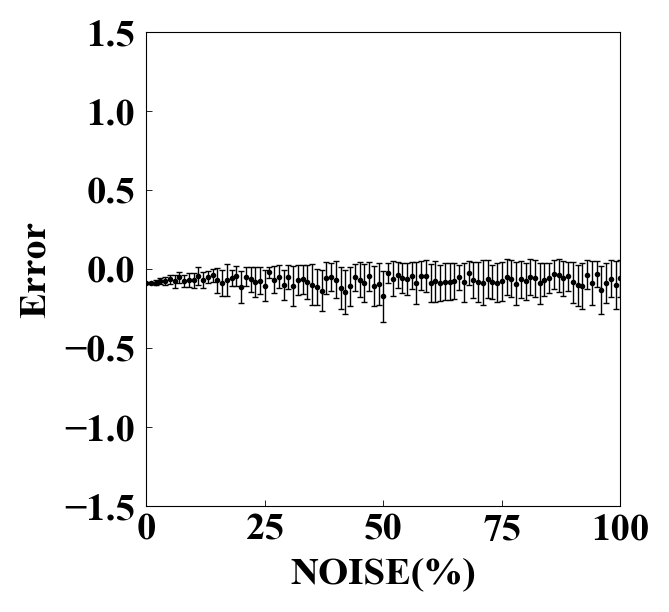

In [10]:
#結果の表示と保存_0
dt_now = datetime.datetime.now()
print('現在時刻：', dt_now)
save_name = dt_now.strftime("%Y-%m-%d_%H-%M") +f'_{NOISE}%_avestd.svg'
save_file = os.path.join(save_folder, save_name) # 保存先のファイルパス作成
fig = plt.figure()
ax = fig.add_subplot(111)
ax.errorbar(test_nums, ave_0, yerr = std_0, capsize=1, capthick=0.5, fmt='o', markersize=1, elinewidth=0.5 , ecolor='black', markeredgecolor = "black")
ax.set_xlabel('NOISE(%)',fontsize=14)          # 軸ラベル
ax.set_ylabel('Error',fontsize=14)
ax.set_ylim(-1.5, 1.5)
ax.set_xlim(0., 100.)
plt.tick_params(labelsize=14)
ax.set_aspect(1./ax.get_data_ratio()) # グラフを正方形にする
fig.savefig(save_file, format="svg", bbox_inches="tight")
fig.show()
print('保存ファイル名：', save_name)
print('保存ファイルパス：', save_file)
for i in range(0,10):
    print_ave = str(i) + "%:" + str(ave_0[i])+ "±" + str(std_0[i])
    print(print_ave)

現在時刻： 2020-11-20 17:33:37.264828


/Users/nagaiyuma/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  app.launch_new_instance()


保存ファイル名： 2020-11-20_17-33_80%_avestd.svg
保存ファイルパス： /Users/nagaiyuma/Documents/myprogram/savefig80%/2020-11-20_17-33_80%_avestd.svg
0%:0.0413360595703125±0.0
1%:0.040656757354736325±0.002236610845242283
2%:0.04092904329299927±0.0041446383252966065
3%:0.045463329553604125±0.0076390821614565904
4%:0.04145495295524597±0.009041242971601691
5%:0.04193986654281616±0.011858632994594588
6%:0.040407991409301756±0.013751353601759492
7%:0.04587627649307251±0.01618318146317155
8%:0.03736357688903809±0.014961797627189863
9%:0.03960151672363281±0.02274270751302303


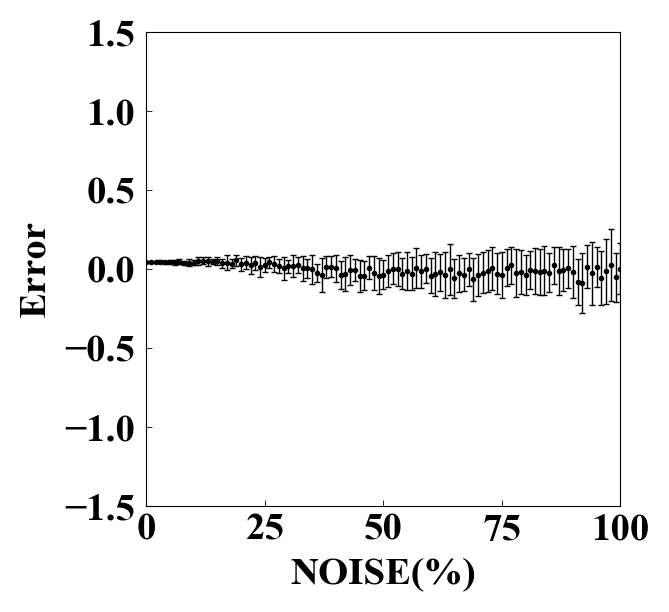

In [12]:
#結果の表示と保存_1
dt_now = datetime.datetime.now()
print('現在時刻：', dt_now)
save_name = dt_now.strftime("%Y-%m-%d_%H-%M") +f'_{NOISE}%_avestd.svg'
save_file = os.path.join(save_folder, save_name) # 保存先のファイルパス作成
fig = plt.figure()
ax = fig.add_subplot(111)
ax.errorbar(test_nums, ave_1, yerr = std_1, capsize=1, capthick=0.5, fmt='o', markersize=1, elinewidth=0.5 , ecolor='black', markeredgecolor = "black")
ax.set_xlabel('NOISE(%)',fontsize=14)          # 軸ラベル
ax.set_ylabel('Error',fontsize=14)
ax.set_ylim(-1.5, 1.5)
ax.set_xlim(0., 100.)
plt.tick_params(labelsize=14)
ax.set_aspect(1./ax.get_data_ratio()) # グラフを正方形にする
fig.savefig(save_file, format="svg", bbox_inches="tight")
fig.show()
print('保存ファイル名：', save_name)
print('保存ファイルパス：', save_file)
for i in range(0,10):
    print_ave = str(i) + "%:" + str(ave_1[i])+ "±" + str(std_1[i])
    print(print_ave)

現在時刻： 2020-12-14 20:06:45.422862


/Users/nagaiyuma/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


保存ファイル名： 2020-12-14_20-06_80%_std.png
保存ファイルパス： /Users/nagaiyuma/Documents/myprogram/201214/2020-12-14_20-06_80%_std.png


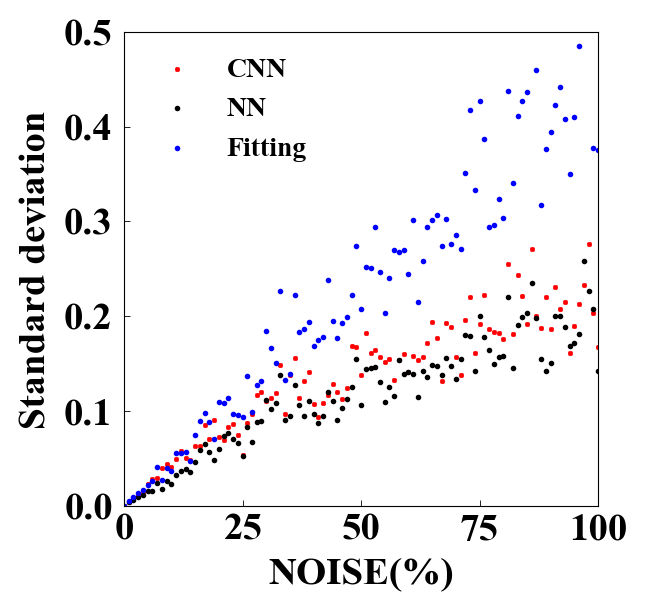

In [13]:
#標準偏差の比較と保存
dt_now = datetime.datetime.now()
print('現在時刻：', dt_now)
save_name = dt_now.strftime("%Y-%m-%d_%H-%M") +f'_{NOISE}%_std.png'
save_file = os.path.join(save_folder, save_name) # 保存先のファイルパス作成
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(test_nums, std_0, s=1, marker='s', color = "red", label= 'CNN')
ax.scatter(test_nums, std_1, s=1, marker='o', color = "black", label= 'NN')
ax.scatter(test_nums, std_fit, s=1, marker='o', color = "blue", label= 'Fitting')
plt.legend(frameon=False, loc='upper left', fontsize=10)
ax.set_xlabel('NOISE(%)',fontsize=14)          # 軸ラベル
ax.set_ylabel('Standard deviation',fontsize=14)
ax.set_ylim(0, 0.5)
ax.set_xlim(0., 100.)
plt.tick_params(labelsize=14)
ax.set_aspect(1./ax.get_data_ratio()) # グラフを正方形にする
fig.savefig(save_file, format="png", bbox_inches="tight")
fig.show()
print('保存ファイル名：', save_name)
print('保存ファイルパス：', save_file)

現在時刻： 2020-12-14 20:07:32.822501


/Users/nagaiyuma/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


保存ファイル名： 2020-12-14_20-07_80%_ave.png
保存ファイルパス： /Users/nagaiyuma/Documents/myprogram/201214/2020-12-14_20-07_80%_ave.png


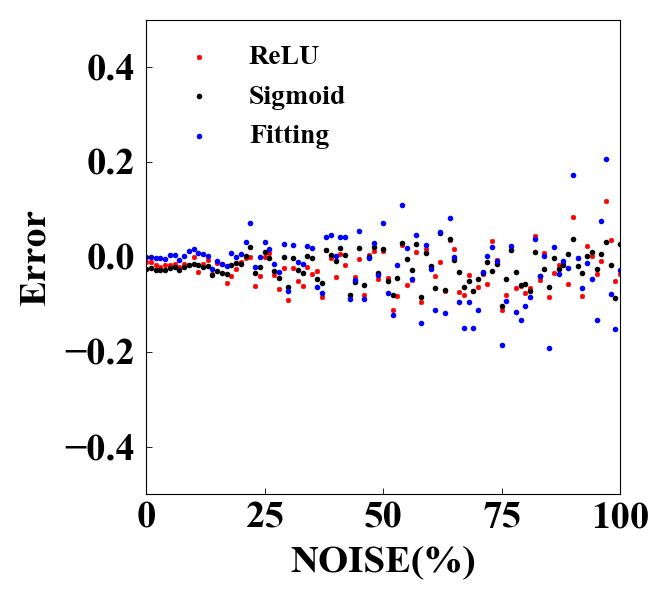

In [15]:
#平均誤差の比較と保存
dt_now = datetime.datetime.now()
print('現在時刻：', dt_now)
save_name = dt_now.strftime("%Y-%m-%d_%H-%M") +f'_{NOISE}%_ave.png'
save_file = os.path.join(save_folder, save_name) # 保存先のファイルパス作成
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(test_nums, ave_0, s=1, marker='s', color = "red", label= 'ReLU')
ax.scatter(test_nums, ave_1, s=1, marker='o', color = "black",  label= 'Sigmoid')
ax.scatter(test_nums, ave_fit, s=1, marker='o', color = "blue", label= 'Fitting')
plt.legend(frameon=False, loc='upper left', fontsize=10)
ax.set_xlabel('NOISE(%)',fontsize=14)          # 軸ラベル
ax.set_ylabel('Error',fontsize=14)
ax.set_ylim(-0.5, 0.5)
ax.set_xlim(0., 100.)
plt.tick_params(labelsize=14)
ax.set_aspect(1./ax.get_data_ratio()) # グラフを正方形にする
fig.savefig(save_file, format="png", bbox_inches="tight")
fig.show()
print('保存ファイル名：', save_name)
print('保存ファイルパス：', save_file)

In [11]:
#フィッティング
i0 = 1.0
x0 = 0.0
y0 = 0.0
w0 = 5.0
h0 = 0.0
center = data_size/2
param_ini_x = np.array([i0, x0, w0, h0])  # フィッティングの初期値 (ここではデータから推定は行わない)
x_array = np.arange(-center, center, 1.0)
fit_param_x = np.zeros((test_num, 4))
error = np.zeros((file_num, test_num))

t_fit = t_101 - 1 #x = 0の補正
for i in range(file_num):
    for k in range(test_num):
        profile_x = x_101[i][k]
        param, cov  = curve_fit(gaussian_beam, x_array, profile_x, p0=param_ini_x, maxfev=2000)
        fit_param_x[n][0] = param[0]
        fit_param_x[n][1] = param[1]
        fit_param_x[n][2] = param[2]
        fit_param_x[n][3] = param[3]
        error[i][k] = param[1]

ave_fit = np.average(error, axis=0)
std_fit= np.std(error, axis=0)
for i in range(0,10):
    print_ave = str(i) + "%:" + str(ave_fit[i])+ "±" + str(std_fit[i])
    print(print_ave)

0%:0.0±0.0
1%:0.00025852747296330024±0.005486675360067959
2%:-0.0018489099694401362±0.009922144613173168
3%:-0.0030679611437103745±0.01372839625886903
4%:-0.004112620867806232±0.017026986562676653
5%:0.0030029619273444575±0.02243007686052931
6%:0.004454834179277589±0.026317577308183047
7%:-0.0060938021321298086±0.04153411637329802
8%:0.0028824845174009093±0.0271236010886196
9%:0.012394044097504645±0.03950190873516582
